In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('../data/clean_data.csv')
print(data.head())

  Country  Year  Expectancy_in_years           GDP
0   Chile  2000                 77.3  7.786093e+10
1   Chile  2001                 77.3  7.097992e+10
2   Chile  2002                 77.8  6.973681e+10
3   Chile  2003                 77.9  7.564346e+10
4   Chile  2004                 78.0  9.921039e+10


# Question1: Is there a correlation between GDP and life expectancy within each country? #

In [11]:
correlations = []

for country in data['Country'].unique():
    sub_data = data[data['Country'] == country]
    corr = sub_data['GDP'].corr(sub_data['Expectancy_in_years'])
    correlations.append({
        'Country': country,
        'Correlation': round(corr,2)
        })

correlation_data = pd.DataFrame(correlations)
print(correlation_data)

                    Country  Correlation
0                     Chile         0.95
1                     China         0.91
2                   Germany         0.93
3                    Mexico         0.93
4  United States of America         0.98
5                  Zimbabwe         0.97


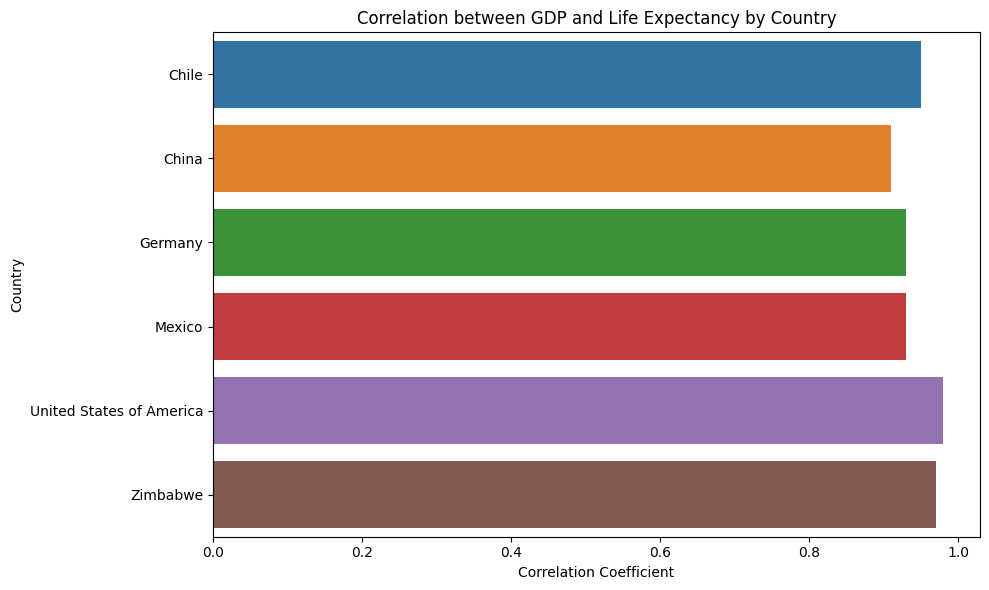

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(data=correlation_data,x='Correlation',y='Country',hue='Country',dodge=False)
plt.title('Correlation between GDP and Life Expectancy by Country')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
plt.clf()

#### Answer ####


|Country|Correlation|Interpretation|
|---|---|----------|
|United States|0.98|Almost perfect positive correlation — as GDP rises, life expectancy increases in near-lockstep.|
|Zimbabwe|0.97|Very strong correlation despite its lower baseline — economic growth is strongly tied to improved health outcomes.|
|Chile, Germany, Mexico|~0.93–0.95|Consistent, strong relationships — likely reflecting investments in healthcare, infrastructure, etc., as GDP rises.|
|China|0.91|	Strong correlation — economic expansion has likely contributed to improved living standards and health.|

*There is a clear, strong positive relationship between a country’s economic performance (GDP) and life expectancy. While correlation does not imply causation, this pattern suggests that rising wealth is closely associated with better public health outcomes across all countries in your dataset.*

# Question2: How does the relationship between GDP and life expectancy differ across countries? #

In [15]:
correlations = []

for country in data['Country'].unique():
    sub_data = data[data['Country'] == country]
    corr = sub_data['GDP'].corr(sub_data['Expectancy_in_years'])
    correlations.append({
        'Country': country,
        'Correlation': round(corr,2)
        })

correlation_data = pd.DataFrame(correlations)
print(correlation_data)

                    Country  Correlation
0                     Chile         0.95
1                     China         0.91
2                   Germany         0.93
3                    Mexico         0.93
4  United States of America         0.98
5                  Zimbabwe         0.97


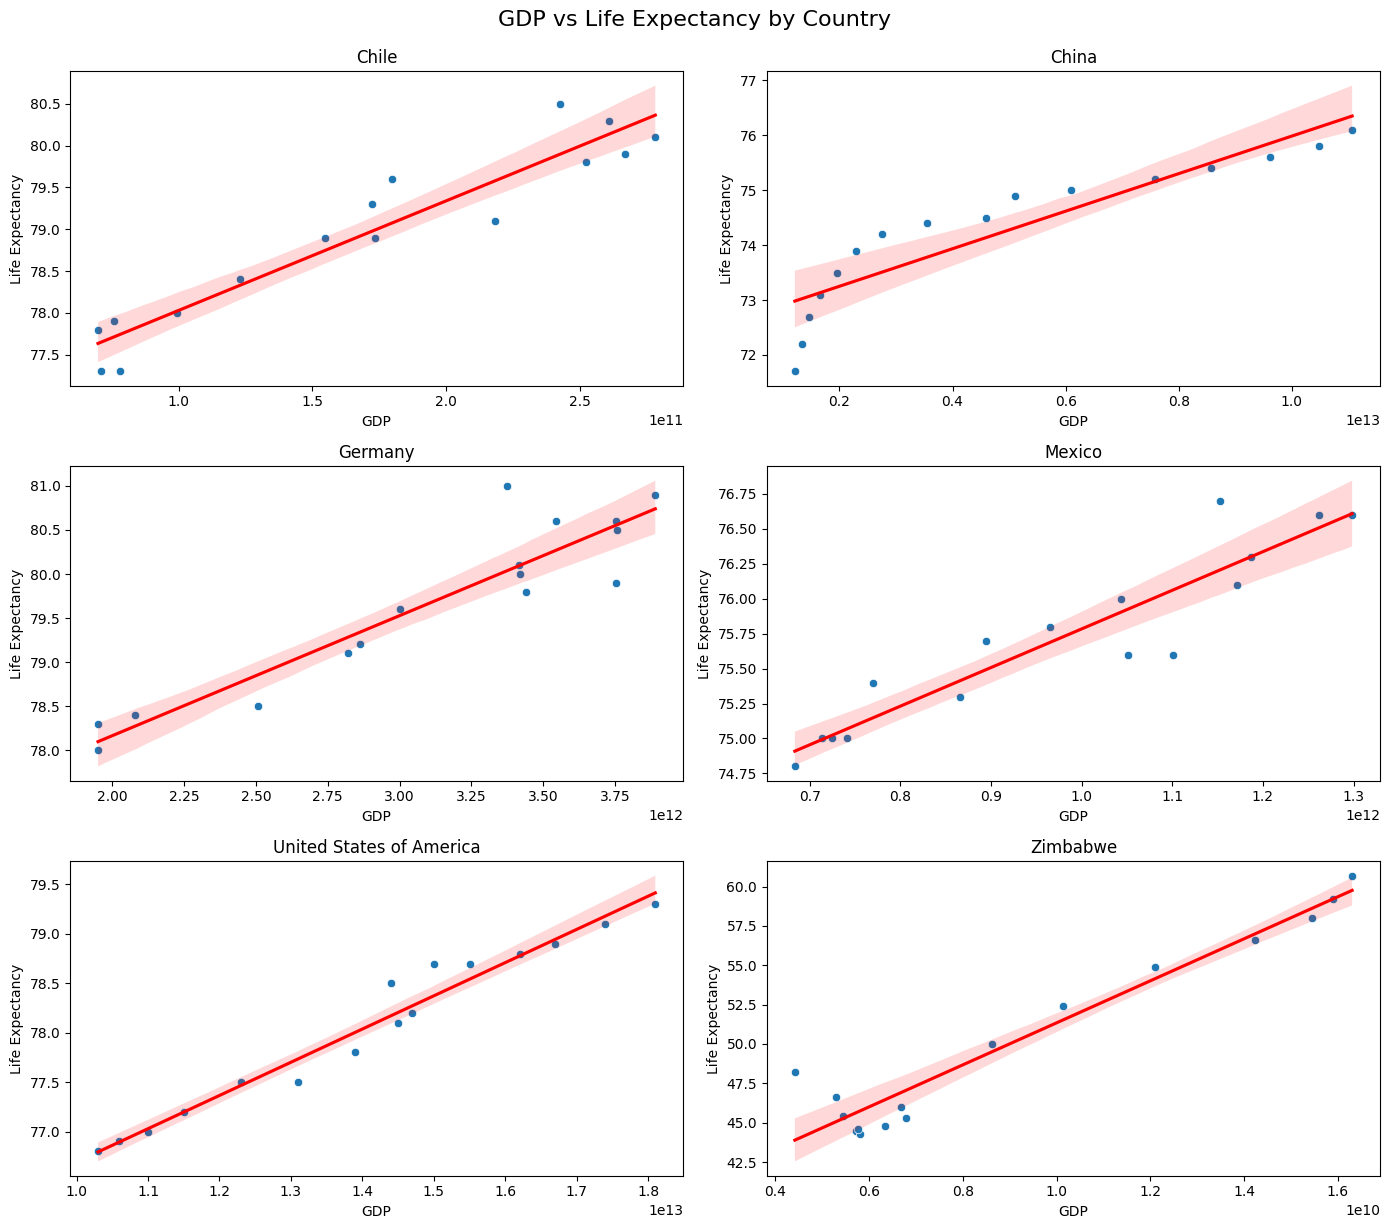

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_gdp_vs_life_by_country(data):
    countries = data['Country'].unique()
    num_countries = len(countries)

    cols = 2
    rows = (num_countries + cols - 1) // cols

    plt.figure(figsize=(14, 4 * rows))

    for i, country in enumerate(countries):
        sub_data = data[data['Country'] == country]

        plt.subplot(rows, cols, i + 1)
        sns.scatterplot(x='GDP', y='Expectancy_in_years', data=sub_data)
        sns.regplot(x='GDP', y='Expectancy_in_years', data=sub_data, scatter=False, color='red')

        plt.title(country)
        plt.xlabel('GDP')
        plt.ylabel('Life Expectancy')

    plt.tight_layout()
    plt.suptitle('GDP vs Life Expectancy by Country', fontsize=16, y=1.02)
    plt.show()
    plt.clf()

plot_gdp_vs_life_by_country(data)

#### Answer ####

*The correlation coefficients between GDP and life expectancy are strong and positive for all six countries, indicating that as GDP increases, life expectancy tends to rise as well.*

*United States (0.98) and Zimbabwe (0.97) show the strongest correlations, suggesting a very tight link between economic performance and health outcomes over time. For the U.S., this may reflect how technological, healthcare, and infrastructure investments scale with GDP. For Zimbabwe, improvements in GDP might directly influence access to healthcare and nutrition, given its lower baseline.*

*Chile (0.95), Germany (0.93), and Mexico (0.93) also show strong relationships, implying that gains in GDP have been accompanied by improvements in life expectancy—though not perfectly.*

*China (0.91), while still showing a strong correlation, has the "lowest" among the group. This could reflect complex socio-political factors, regional disparities, or population size influencing health gains differently across provinces.*

*Across all countries, economic growth appears to significantly contribute to improved life expectancy. However, the strength of this relationship varies slightly by country, possibly due to differences in how efficiently economic resources are converted into public health outcomes.*

# Question3: Does a higher GDP always correspond to higher life expectancy over time? #

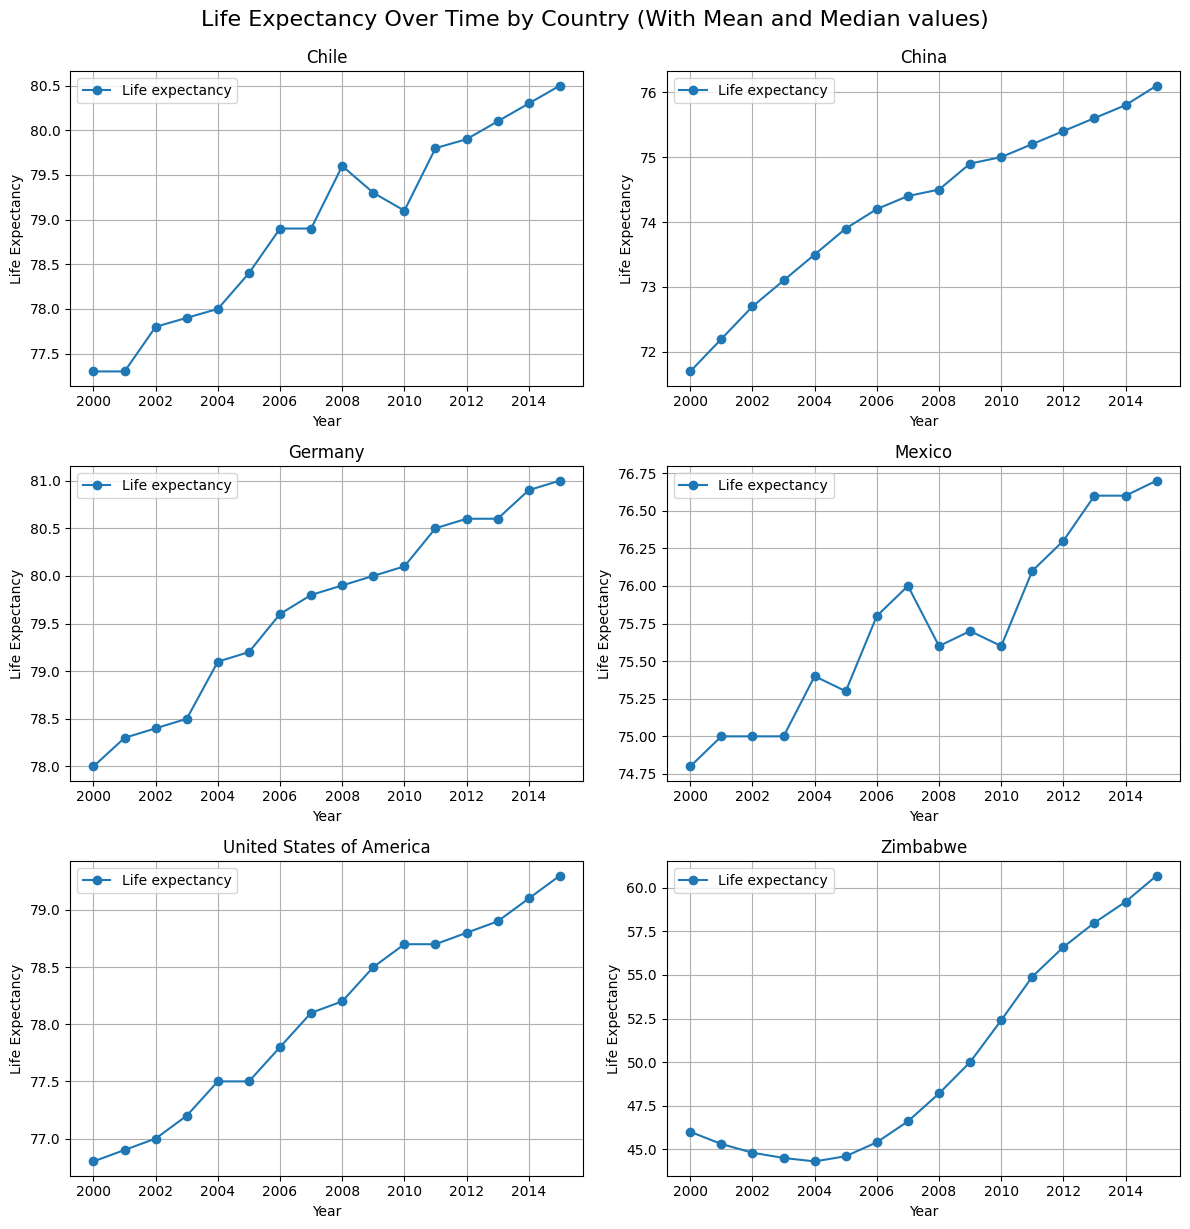

<Figure size 640x480 with 0 Axes>

In [21]:
def plot_life_vs_gdp(data,value_col='Expectancy_in_years',country_col='Country',year_col='Year'):
    countries = data[country_col].unique()
    num_countries = len(countries)

    cols = 2
    rows = (num_countries + cols - 1) // cols

    plt.figure(figsize=(12,4 * rows))

    for i in range(num_countries):
        country = countries[i]
        country_data = data[data[country_col] == country].sort_values(by=year_col)

        plt.subplot(rows,cols, i + 1)
        plt.plot(country_data[year_col],country_data[value_col],marker='o',label='Life expectancy')
        plt.title(country)
        plt.xlabel('Year')
        plt.ylabel('Life Expectancy')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.suptitle('Life Expectancy Over Time by Country (With Mean and Median values)',fontsize=16,y=1.02)
    plt.show()
    plt.clf()

plot_life_vs_gdp(data)

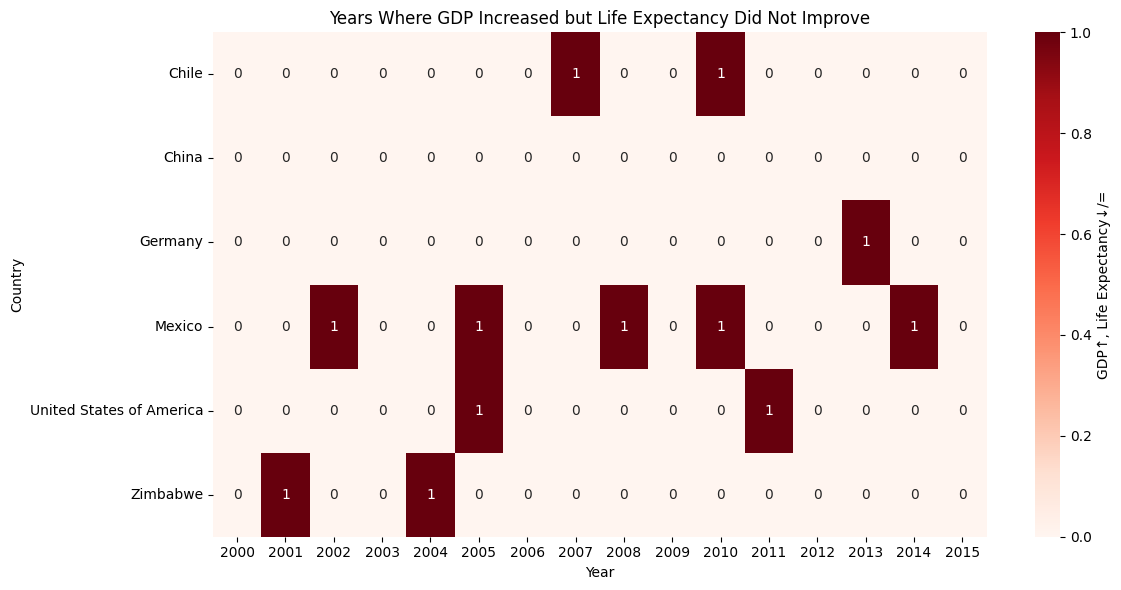

<Figure size 640x480 with 0 Axes>

In [22]:
data_sorted = data.sort_values(['Country', 'Year']).copy()
data_sorted['GDP_Change'] = data_sorted.groupby('Country')['GDP'].diff()
data_sorted['Life_Change'] = data_sorted.groupby('Country')['Expectancy_in_years'].diff()

data_sorted['Flag'] = ((data_sorted['GDP_Change'] > 0) & (data_sorted['Life_Change'] <= 0)).astype(int)

pivot_flag = data_sorted.pivot(index='Country', columns='Year', values='Flag').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_flag, cmap='Reds', annot=True, cbar_kws={'label': 'GDP↑, Life Expectancy↓/='})
plt.title('Years Where GDP Increased but Life Expectancy Did Not Improve')
plt.tight_layout()
plt.show()
plt.clf()


#### Answer ####

*GDP Growth ≠ Life Expectancy Growth (Always):*

**The analysis highlights that an increase in GDP does not always lead to improvements in life expectancy within a given year.*

**In several countries, there are years where the economy expanded but life expectancy either plateaued or worsened.*

*Possible Explanations for the Disconnect:*

**Unequal wealth distribution: Economic growth may benefit only a segment of the population, leaving public health unaffected.*

**Health crises or social unrest: Events like epidemics, poor healthcare access, or violence can reduce life expectancy even amid rising GDP.*

**Environmental or occupational hazards: Industrial growth might increase GDP but harm public health through pollution or unsafe work conditions.*

*Country-Specific Patterns:*
**
**Developing nations may show more years with this disconnect due to volatile socio-economic factors.*

*Developed nations tend to have fewer such years, but they are not immune—economic gains may still not translate into immediate health benefits.*


*These findings suggest that while GDP is an important indicator of economic performance, it should not be viewed as a standalone measure of societal well-being. Policies aiming for sustainable development should consider health equity and social infrastructure, not just economic output.*
